<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 의료비 예측


<img src = "https://github.com/Jangrae/img/blob/master/medical.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 하위 몇 개 행 확인
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [8]:
# 상관분석
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


5-2) 상관관계를 시각화해 확인합니다.

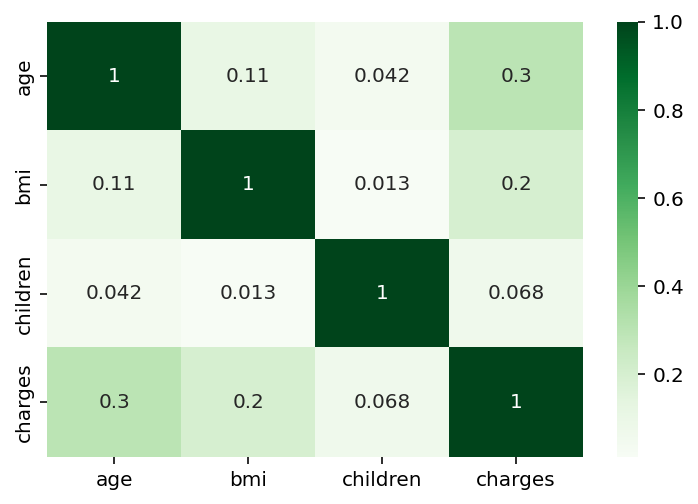

In [9]:
# 상관분석
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

- 가장 높은 상관관계는 age와 charges의 관계이다.
- 가장 낮은 상관관계는 children과 age의 관계이다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [10]:
# 범주값 개수 확인

print(data.value_counts('sex'))
print('='*30)
print(data.value_counts('children'))
print('='*30)
print(data.value_counts('smoker'))

sex
male      676
female    662
dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
smoker
no     1064
yes     274
dtype: int64


**7) 주요 변수 확인**

7-1) charges 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

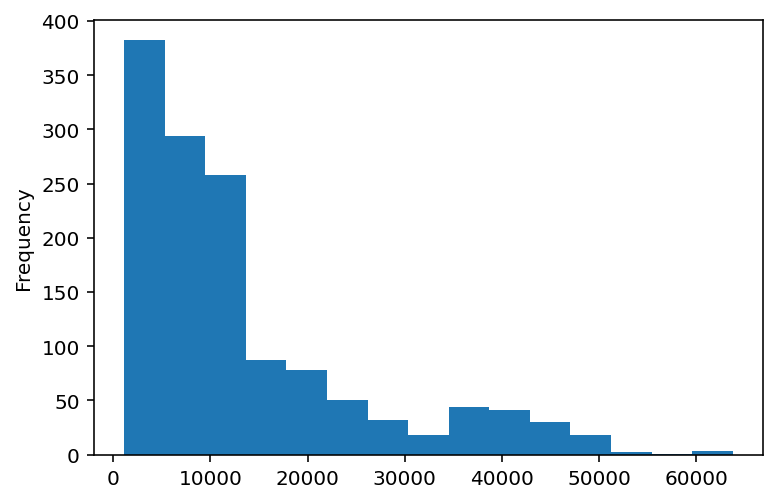

In [11]:
# charges 값 분포

data['charges'].plot(kind='hist', bins=15)
plt.show()

- 0~10000의 분포가 가장 많으며 뒤로 갈 수록 줄어드는 추세가 보이다가 35000구간에서 다시 증가한다.
- 50000-60000구간은 현저히 낮게 분석된다.

7-2) age, charges 변수간 상관관계를 산점도(Scatter Plot)으로 시각화해 확인합니다.

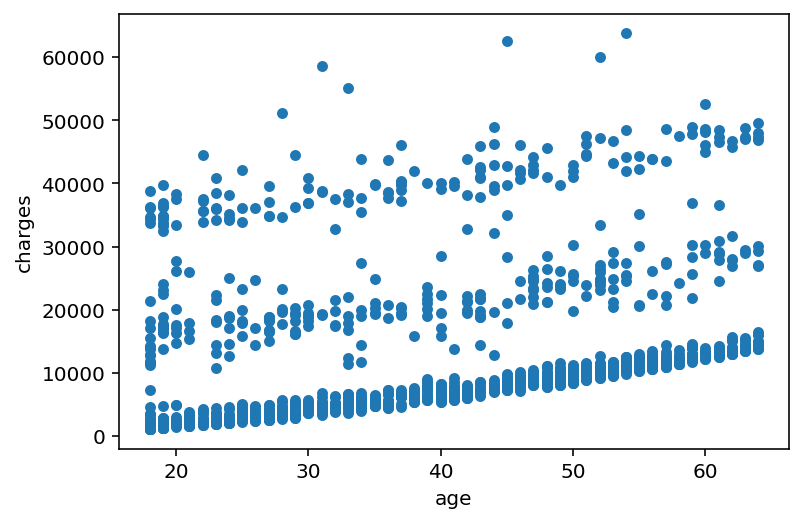

In [12]:
# age, charges 상관관계
data.plot(kind='scatter', x='age', y='charges', figsize=(6,4))
plt.show()

- 나이가 많아질수록 의료비도 증가하는 형태를 보인다.
- 60대는 의료비가 10000부터 시작한다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

- sex, smoker, region 변수들에 대한 가변수화를 진행 합니다.

In [13]:
# 가변수화
dummy_vars = ['sex','smoker','region']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

# 확인
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**2) 상관분석**

2-1) 변수가 추가되었으니 변수들 간의 상관관계를 다시 확인합니다.

In [14]:
# 상관분석
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


2-2) 변수들 간의 상관관계를 다시 시각화해 확인합니다.

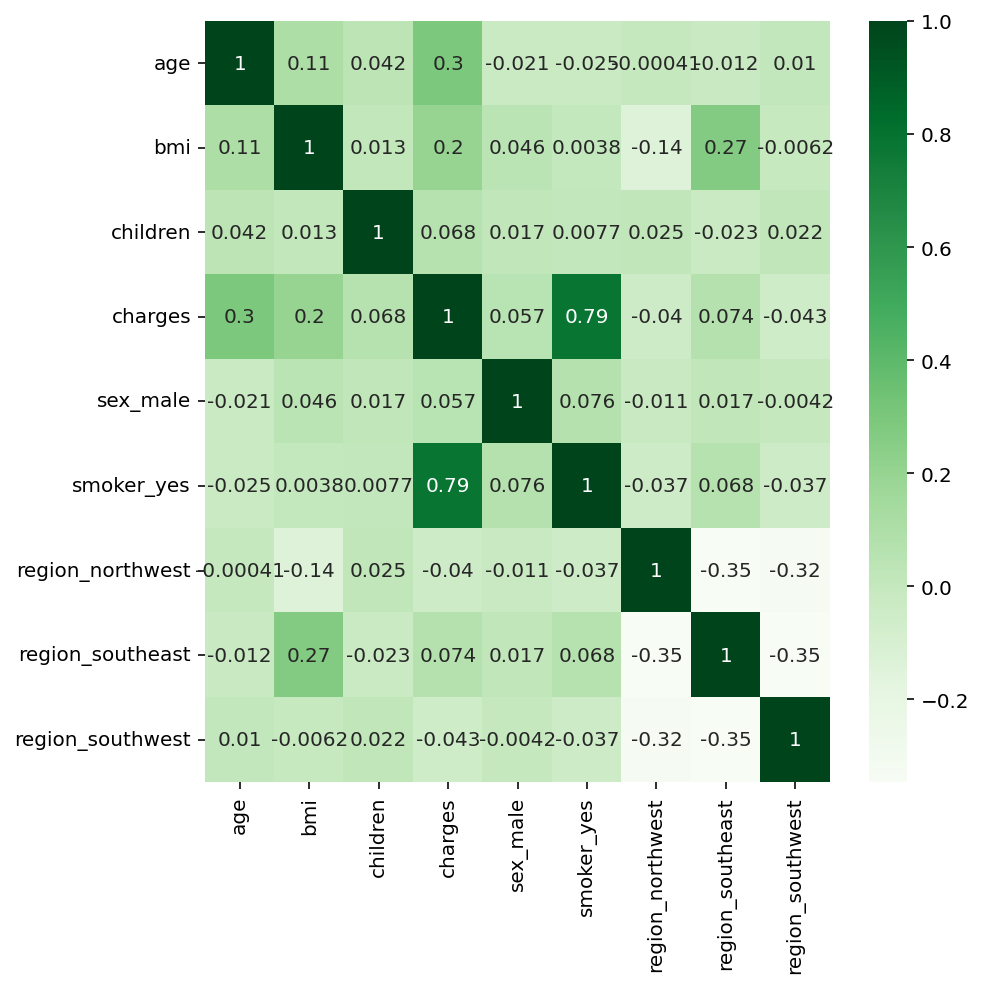

In [15]:
# 상관분석
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

- smoker_yes와 charges의 상관관계가 가장 높다.
- region_northwest와 age의 상관관계가 가장 낮다.

**3) x, y 분리**

- charges 변수가 Target입니다.

In [16]:
# target 확인
target ='charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [17]:
# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [18]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용이 있으면 이를 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

### 4.1.1.모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [19]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [20]:
# 2단계: 선언하기
model = LinearRegression()

In [21]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [23]:
# 5단계: 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4023.060412326256
0.7815638027456551


### 4.1.2.회귀 계수 확인

- 모델의 coef_, intercept_ 속성으로 변수들의 회귀 계수를 확인합니다.

In [24]:
# 회귀 계수 확인
print(list(x))
print(model.coef_)
print(model.intercept_)

['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
[  243.60038821   306.46006963   472.73303281  -221.31454859
 23707.39225536  -121.77571388 -1088.93802262  -877.25427208]
-10334.708051219171


- 모델의 회귀 계수(coef_)를 가로막대 그래프로 시각화해 확인합니다.

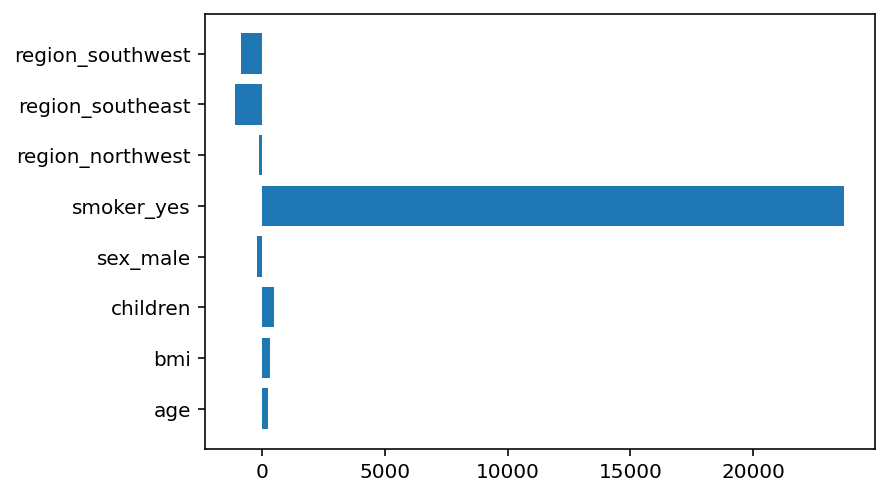

In [25]:
# 변수별 회귀계수 시각화

plt.barh(list(x),model.coef_)
plt.show()

- smoker_yes가 charges와 가장 중요한 변수로 나타난다.
- 흡연유무 다음으로 지역에 대한 차이가 중요한 변수로 나타난다.

### 4.1.3.성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [26]:
# 성능 정보 수집
score={}
score['Linear Regression'] = r2_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [61]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [62]:
# 2단계: 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [63]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [64]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [65]:
# 5단계: 평가하기
print('MAE:',mean_absolute_error(y_test, y_pred))
print('R2_score:',r2_score(y_test, y_pred))

MAE: 2881.683901691543
R2_score: 0.7442120624775168


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [32]:
# 중요도 확인
scores = pd.DataFrame()
scores['feature'] = list(x)
scores['importance'] = model.feature_importances_
scores.sort_values(by='importance', ascending=True, inplace=True)
scores

,feature,importance
7,region_southwest,0.001697
3,sex_male,0.005156
5,region_northwest,0.005486
6,region_southeast,0.007553
2,children,0.019441
0,age,0.132458
1,bmi,0.209705
4,smoker_yes,0.618503


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

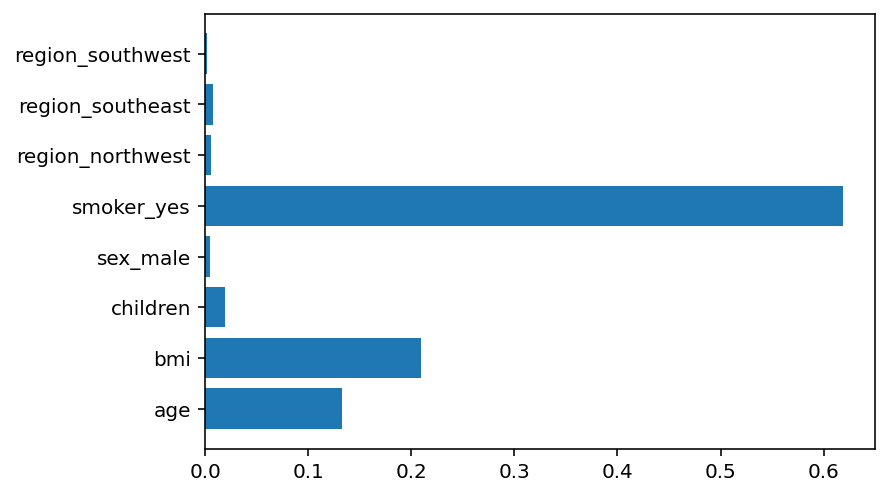

In [33]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- smoker_yes의 중요도가 가장 높게 나타난다.
- 지역의 중요도는 낮게 나타나고 bmi와 age의 중요도도 높게 나타났다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [34]:
# 성능 정보 수집
score['Decision Tree'] = r2_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [35]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
# 2단계: 선언하기
model = RandomForestRegressor(random_state=2022)

In [37]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [38]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [39]:
# 5단계: 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2546.9596018735906
0.8626561004669977


### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [40]:
# 중요도 확인
scores = pd.DataFrame()
scores['feature'] = list(x)
scores['importance'] = model.feature_importances_
scores.sort_values(by='importance', ascending=True, inplace=True)
scores

,feature,importance
7,region_southwest,0.004762
3,sex_male,0.006278
6,region_southeast,0.006378
5,region_northwest,0.006636
2,children,0.022583
0,age,0.130584
1,bmi,0.206523
4,smoker_yes,0.616256


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

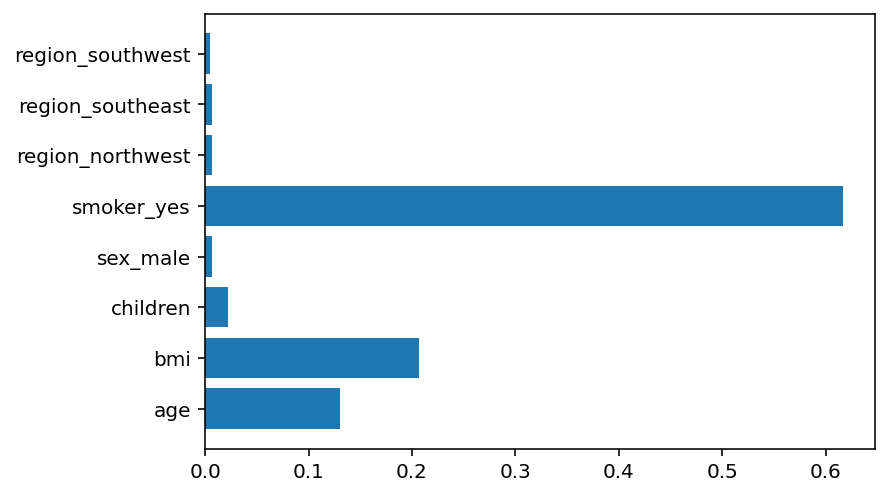

In [41]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- smoker_yes의 중요도가 가장 높게 나타났고, bmi-age순으로 높게 나타났다.
- 지역과 성별은 중요한 변수가 아닌듯하다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [42]:
# 성능 정보 수집
score['Random Forest'] = r2_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [43]:
# 1단계: 불러오기
from xgboost import XGBRegressor

In [44]:
# 2단계: 선언하기
model = XGBRegressor(random_state=2022)

In [45]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [47]:
# 5단계: 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2983.640758507754
0.8325147792080578


### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [48]:
# 중요도 확인
scores = pd.DataFrame()
scores['feature'] = list(x)
scores['importance'] = model.feature_importances_
scores.sort_values(by='importance', ascending=True, inplace=True)
scores

,feature,importance
3,sex_male,0.004114
7,region_southwest,0.004794
6,region_southeast,0.005052
5,region_northwest,0.005926
2,children,0.007779
0,age,0.015657
1,bmi,0.018605
4,smoker_yes,0.938072


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

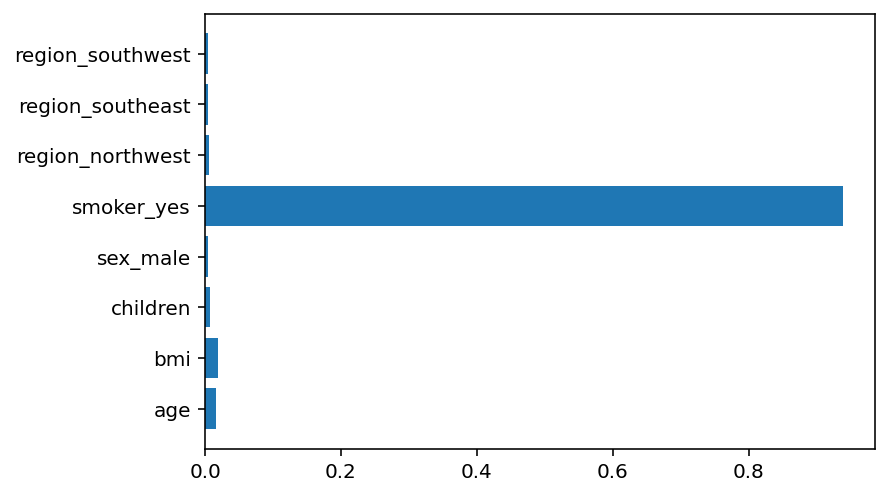

In [49]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- smoker_yes의 중요도가 가장 높게 나타났다.
- smoker를 제외하고 나머지의 중요도는 비슷하게 나타난다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [50]:
# 성능 정보 수집
score['XGBoost'] = r2_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.7816
-Decision Tree: 0.7442
-Random Forest: 0.8627
-XGBoost: 0.8325


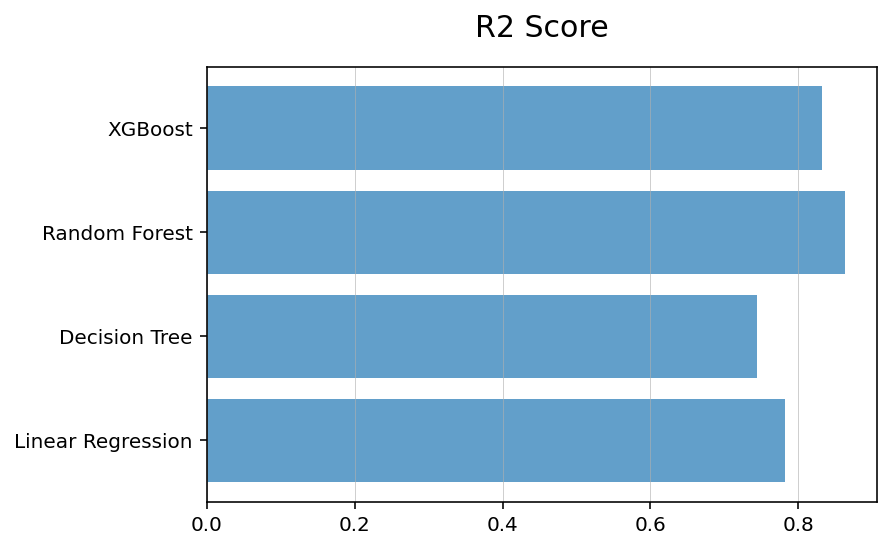

In [51]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견)
- (의견)
- (의견)

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [66]:
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth':range(1,51),
        'min_samples_split':range(1,11)}

model_dt = DecisionTreeRegressor()

model = RandomizedSearchCV(model_dt, param, cv=10, n_iter=20, n_jobs=-1)

model.fit(x_train,y_train)

print(model.best_params_)
print(model.best_score_)

#예측하기
y_pred = model.predict(x_test)

print("-"*30)

#평가하기
print('MAE:',mean_absolute_error(y_test, y_pred))
print('R2_score:',r2_score(y_test, y_pred))

{'min_samples_split': 5, 'max_depth': 4}
0.8368079465004445
------------------------------
MAE: 2642.1056331839927
R2_score: 0.8702213205396616


- (의견)
- (의견)
- (의견)